Description of Assessment Task

“Spam” emails are a major issue in everyday life and spam filters have now become a necessity in all aspects of life. The data set attached is real life example of emails that have been sent to a company and have been labelled as True (is spam) and False (not spam). This is a high dimensional dataset that needs to be prepared for classification, in order to create a ML mode for spam filtering. 


- Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc. and what these Characterisation mean in the context of this data.

In [1]:
# import libraries to be used in the analysis 


%matplotlib inline 
import numpy as np                     #numerical computations and mathematical functions
from sklearn.decomposition import PCA  #Principal Component Analysis used to reduce the dimensionality of data.
import seaborn as sns;                 # statistical data visualization 
import matplotlib.pyplot as plt        #data visualization
sns.set() 
import pandas as pd                    #data manipulation and analysis library.
from sklearn.preprocessing import StandardScaler # to standardize features
#!pip install missingno #to visualize missing data in datasets
import missingno as msno               # to visualize the missing data pattern
from sklearn.preprocessing import LabelEncoder #for encoding categorical labels as numbers


from sklearn.model_selection import train_test_split #it splits data into training and testing sets.
from sklearn.linear_model import LogisticRegression #machine learning model used for classification tasks
from sklearn.metrics import accuracy_score #a function for evaluating the performance of a classification model



In [2]:
#Loading the Dataset

pd.set_option('display.max_columns', None) # display the maximum number of columns

spambase_df = pd.read_csv('spambase.csv')

In [3]:
#Reading the dataset  

spambase_df

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0,0.00,0.0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0,0.00,0.0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0,0.00,0.0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,4596,0.31,0.00,0.62,0.0,0,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0,0.00,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,False
4597,4597,0.00,0.00,0.00,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0,0.00,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,False
4598,4598,0.30,0.00,0.30,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0,0.00,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,False
4599,4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0,0.00,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,False


In [4]:
#understanding the size of the dataset and how many features (columns) and observations (rows) there are.

spambase_df.shape

(4601, 59)

In [5]:
# Checking for duplicated values

spambase_df.duplicated().sum()

0

In [6]:
# Applying ".info" provides essential information about the DataFrame, 
# such as the number of rows, the names and types of each column and the number of non-null values.

spambase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   float64
 5   word_freq_our               4601 non-null   object 
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4586 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [7]:
# Check for missing values

spambase_df.isnull().sum()

Unnamed: 0                      0
word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab 

In [8]:
# Total number of missing values in the dataset

spambase_df.isnull().sum().sum()

341

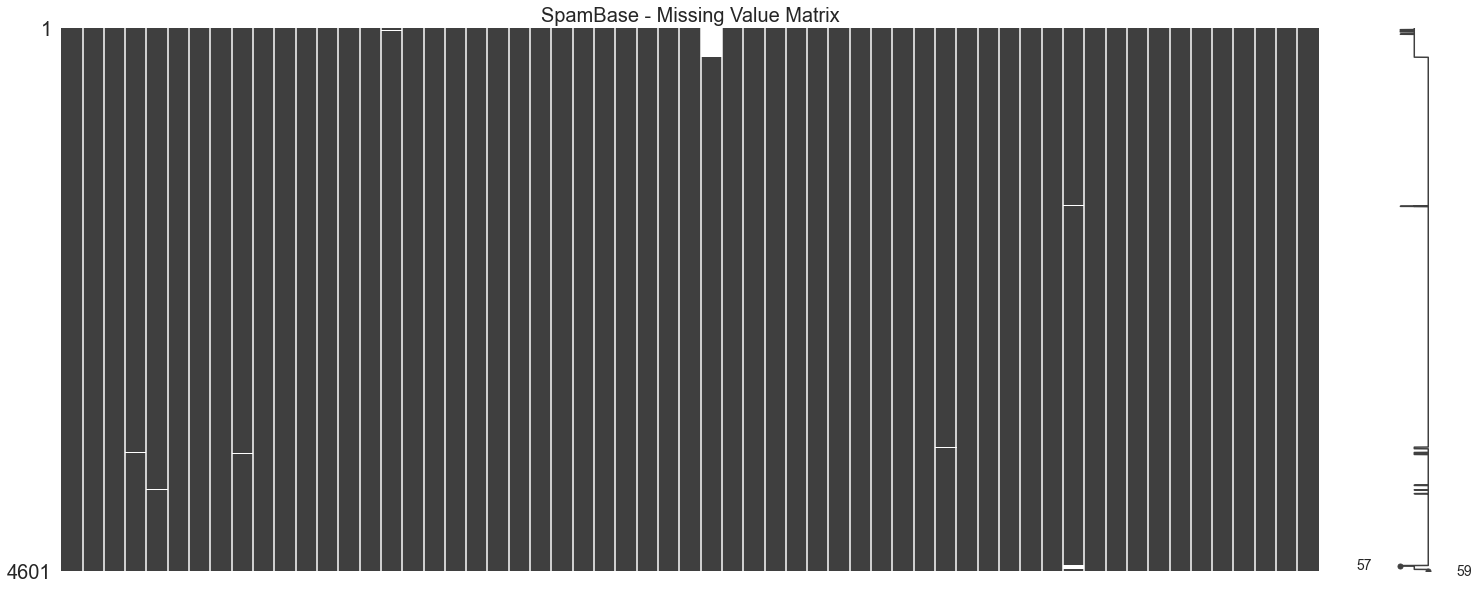

In [9]:
# Visualize the missing data pattern

msno.matrix(spambase_df, sparkline=True)
plt.title('SpamBase - Missing Value Matrix', fontsize=20)
plt.show()

The SpamBase dataset contains 4601 entries and a total of 59 columns. It includes information on word and character frequencies, to be used for spam detection or classification. Columns 1 to 48 show the frequency of specific words in emails, with a few missing values that will be treated in the next step of this analysis. Columns 49 to 54 track the frequency of certain characters (like: !, [, $, #), which are often employed in spam emails to quickly  get the attention of the reader. Columns 55 to 57 measure capital letter patterns like average length of capitalized sequences, longest sequence and total number of capital letters, as spam emails often use capital letters to grab attention. Column 58 is a binary label, indicates whether each email is spam (True) or not (False) and serves as the target variable for training a spam detection model. Some columns are showing as non-numeric due to formatting issues, which will also be treated in the next step of this analysis. Overall, this dataset’s features can capture patterns often seen in spam, helping to build predictive models that classify emails as spam or not based on word and character usage and capitalization patterns.

-------------------------------------------------------------------------------------------------------------------------- 

- Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it in the context of this data.

In [10]:
# taking consideration of all types of missing values: 

mvf = ['no','n.a.', 'NA', 'na', 'n/a', 'n\a', '?', '--', 'nan', 'none', 'NAN','NaN', ' nan', '???']

applying "mvf" standardizes how missing values are handled across different data processing steps, ensuring that these different representations are consistently treated as NaN.

In [11]:
spambase_df = pd.read_csv('spambase.csv', na_values= mvf)  #reading the dataset again ignoring missing values

In [12]:
#Dropping the first column of the dataset, labeled "Unnamed: 0," as it is insignificant for the analysis.

spambase_df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
# Calculate percentage of missing values for each column

spambase_df.isnull().sum().sum()* 100 / len(spambase_df)

7.498369919582699

In [14]:
# Calculate the percentage of missing values for each column

spambase_df.isnull().sum() / len(spambase_df) * 100


word_freq_make                0.000000
word_freq_address             0.000000
word_freq_all                 0.130406
word_freq_3d                  0.043469
word_freq_our                 0.021734
word_freq_over                0.021734
word_freq_remove              0.000000
word_freq_internet            0.326016
word_freq_order               0.000000
word_freq_mail                0.000000
word_freq_receive             0.000000
word_freq_will                0.000000
word_freq_people              0.000000
word_freq_report              0.000000
word_freq_addresses           0.195610
word_freq_free                0.000000
word_freq_business            0.000000
word_freq_email               0.000000
word_freq_you                 0.000000
word_freq_credit              0.000000
word_freq_your                0.000000
word_freq_font                0.000000
word_freq_000                 0.021734
word_freq_money               0.000000
word_freq_hp                  0.000000
word_freq_hpl            

The missing values presents in the dataset are minimal, ranging from 0.02% to 5.4% in each column and representing a total of 7.5% of the dataset.DIfferent methods will be aplied to determine which is most effective and has the least impact on the dataset.

In [15]:
# First test- the columns with missing values will be dropped from the dataset 

test1 = spambase_df

In [16]:
#excluding missing values from all columns(axis=1)

test1 = test1.dropna(axis=1) 

In [17]:
test1.isnull().sum() 

word_freq_make                0
word_freq_address             0
word_freq_remove              0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_money               0
word_freq_hp                  0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_telnet              0
word_freq_857                 0
word_freq_data                0
word_freq_415                 0
word_freq_85                  0
word_freq_technology          0
word_freq_1999                0
word_freq_parts               0
word_freq_pm                  0
word_freq_original            0
word_fre

In [18]:
test1.shape

(4601, 45)

In [19]:
# Second test- the observations with missing values will be dropped from the dataset 

test2 = spambase_df

In [20]:
#excluding missing values from all observations (axis = 0)

test2 = test2.dropna(axis=0) 

In [21]:
test2.isnull().sum() 

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [22]:
test2.shape

(4273, 58)

In [23]:
# Teste three - Linear interpolation 
# where value from both side will be taken and draw a line between them and use it to replace the missing values 

test3 = spambase_df 

In [24]:
test3 ['word_freq_all'] = test3 ['word_freq_all'].interpolate(method='linear',direction='backward')
test3 ['word_freq_3d'] = test3 ['word_freq_3d'].interpolate(method='linear',direction='backward')
test3 ['word_freq_over'] = test3 ['word_freq_over'].interpolate(method='linear',direction='backward')
test3 ['word_freq_meeting'] = test3 ['word_freq_meeting'].interpolate(method='linear',direction='backward')
test3 ['word_freq_internet'] = test3 ['word_freq_internet'].interpolate(method='linear',direction='backward')
test3 ['word_freq_addresses'] = test3 ['word_freq_addresses'].interpolate(method='linear',direction='backward')
test3 ['word_freq_direct'] = test3 ['word_freq_direct'].interpolate(method='linear',direction='backward')
test3 ['word_freq_table'] = test3 ['word_freq_table'].interpolate(method='linear',direction='backward')
test3 ['word_freq_cs'] = test3 ['word_freq_cs'].interpolate(method='linear',direction='backward')
test3 ['word_freq_hpl'] = test3 ['word_freq_hpl'].interpolate(method='linear',direction='backward')
test3['word_freq_labs'] = test3 ['word_freq_labs'].interpolate(method='linear',direction='backward')
test3 ['word_freq_000'] = test3 ['word_freq_000'].interpolate(method='linear',direction='backward')
test3['word_freq_our'] = test3 ['word_freq_our'].interpolate(method='linear',direction='backward')

In [25]:
test3.isnull().sum() 

word_freq_make                  0
word_freq_address               0
word_freq_all                   0
word_freq_3d                    0
word_freq_our                   0
word_freq_over                  0
word_freq_remove                0
word_freq_internet              0
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             0
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab                   0
word_freq_labs

In [26]:
test3.shape

(4601, 58)

In [27]:
#Test Four - missing values will be replaced with 0, 
#except for the column word_freq_labs, which will be filled with the column's median.

test4 = spambase_df 

In [28]:
test4 ['word_freq_all'] = test4 ['word_freq_all'].fillna('0')
test4 ['word_freq_3d'] = test4 ['word_freq_3d'].fillna('0')
test4 ['word_freq_over'] = test4 ['word_freq_over'].fillna('0')
test4 ['word_freq_meeting'] = test4 ['word_freq_meeting'].fillna('0')
test4 ['word_freq_internet'] = test4 ['word_freq_internet'].fillna('0')
test4 ['word_freq_addresses'] = test4 ['word_freq_addresses'].fillna('0')
test4 ['word_freq_direct'] = test4 ['word_freq_direct'].fillna('0')
test4 ['word_freq_table'] = test4 ['word_freq_table'].fillna('0')
test4 ['word_freq_cs'] = test4 ['word_freq_cs'].fillna('0')
test4['word_freq_hpl'] = test4 ['word_freq_hpl'].fillna('0')
test4 ['word_freq_000'] = test4 ['word_freq_000'].fillna('0')
test4 ['word_freq_our'] = test4 ['word_freq_our'].fillna('0')

In [29]:
# Fill missing values from column 'word_freq_labs' with its median 
# the median is a better representation of the majority of the values in the variable.

test4['word_freq_labs'].fillna(test4['word_freq_labs'].median(), inplace=True)

In [30]:
test4.isnull().sum() 

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [31]:
test4.shape

(4601, 58)

After applying different methods for treating the missing values, such as removing columns and rows with missing data, linear interpolation, imputation with mean and replacing missing values with zero, the following conclusions were made:
Excluding columns with missing values resulted in the removal of 12 columns, which is nearly 20% of the total. This significant loss of columns due to missing data can have a significant impact in the analysis. Most of these columns have only a few missing entries, so completely dropping them may not be the best option.
When removing rows with missing values, 7.13% of the data was lost (328 out of 4601 entries). This still allows for meaningful analysis, except for the column word_freq_labs, which has 250 missing values.
Linear interpolation was ineffective because it only fills missing values when there is data on both sides of the gap. Therefore, if the missing values are at the beginning or end of the column (leading or trailing NaNs), they will not be filled.
For this reason, using test4 in is more suitable for the dataset. Where all missing values will be replaced with zero, except for the word_freq_labs column. Since this is word frequency data, the absence of these words may indicate they were never used in the email, rather than signaling a data collection error. For instance, if the frequency of the word "urgent" is missing, it could suggest that "urgent" was not included in the email text at all. so using the median for imputation may be the most suitable method. The median is a better representation of the majority of the values in the variable.


In [32]:
df = test4

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

After treating the missing values, the dataset is now complete, with no missing entries and all features represented as numerical values format. 

In [34]:
# Encoding  the column "is Spam"

encoder = LabelEncoder()
df['is_spam'] = encoder.fit_transform(df['is_spam'])

In [35]:
# statistical summary of the dataset

df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095980,0.114208,0.105305,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.045720,0.132339,0.046099,0.079196,0.301224,0.179824,0.005425,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273849,0.391441,0.401069,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.363418,0.766819,0.223812,0.621976,1.011687,0.911119,0.076264,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

Applying "df.describe()" on the dataset, It is possible to see that the average word frequency is generally low, with most values below 1. "word_freq_make" has a mean of 0.10 and "word_freq_address" has a mean of 0.21, showing that these words are rarely used in the emails. The word "you" is the most frequent, with an average of 1.66.
There is considerable variation in word usage, as shown by the standard deviations. For instance, word_freq_address has a high standard deviation of 1.29, indicating a wide range of frequencies. Most features have a minimum value of 0, confirming that many words were not used in many emails.
The maximum values reveal instances of high word frequencies. For example, word_freq_make has a maximum frequency of 4.54, suggesting that some emails include this word quite often. Additionally, capital_run_length_longest reaches 9,989, which suggests that some emails contain long stretches of capital letters, likely indicating spammy or urgent content.


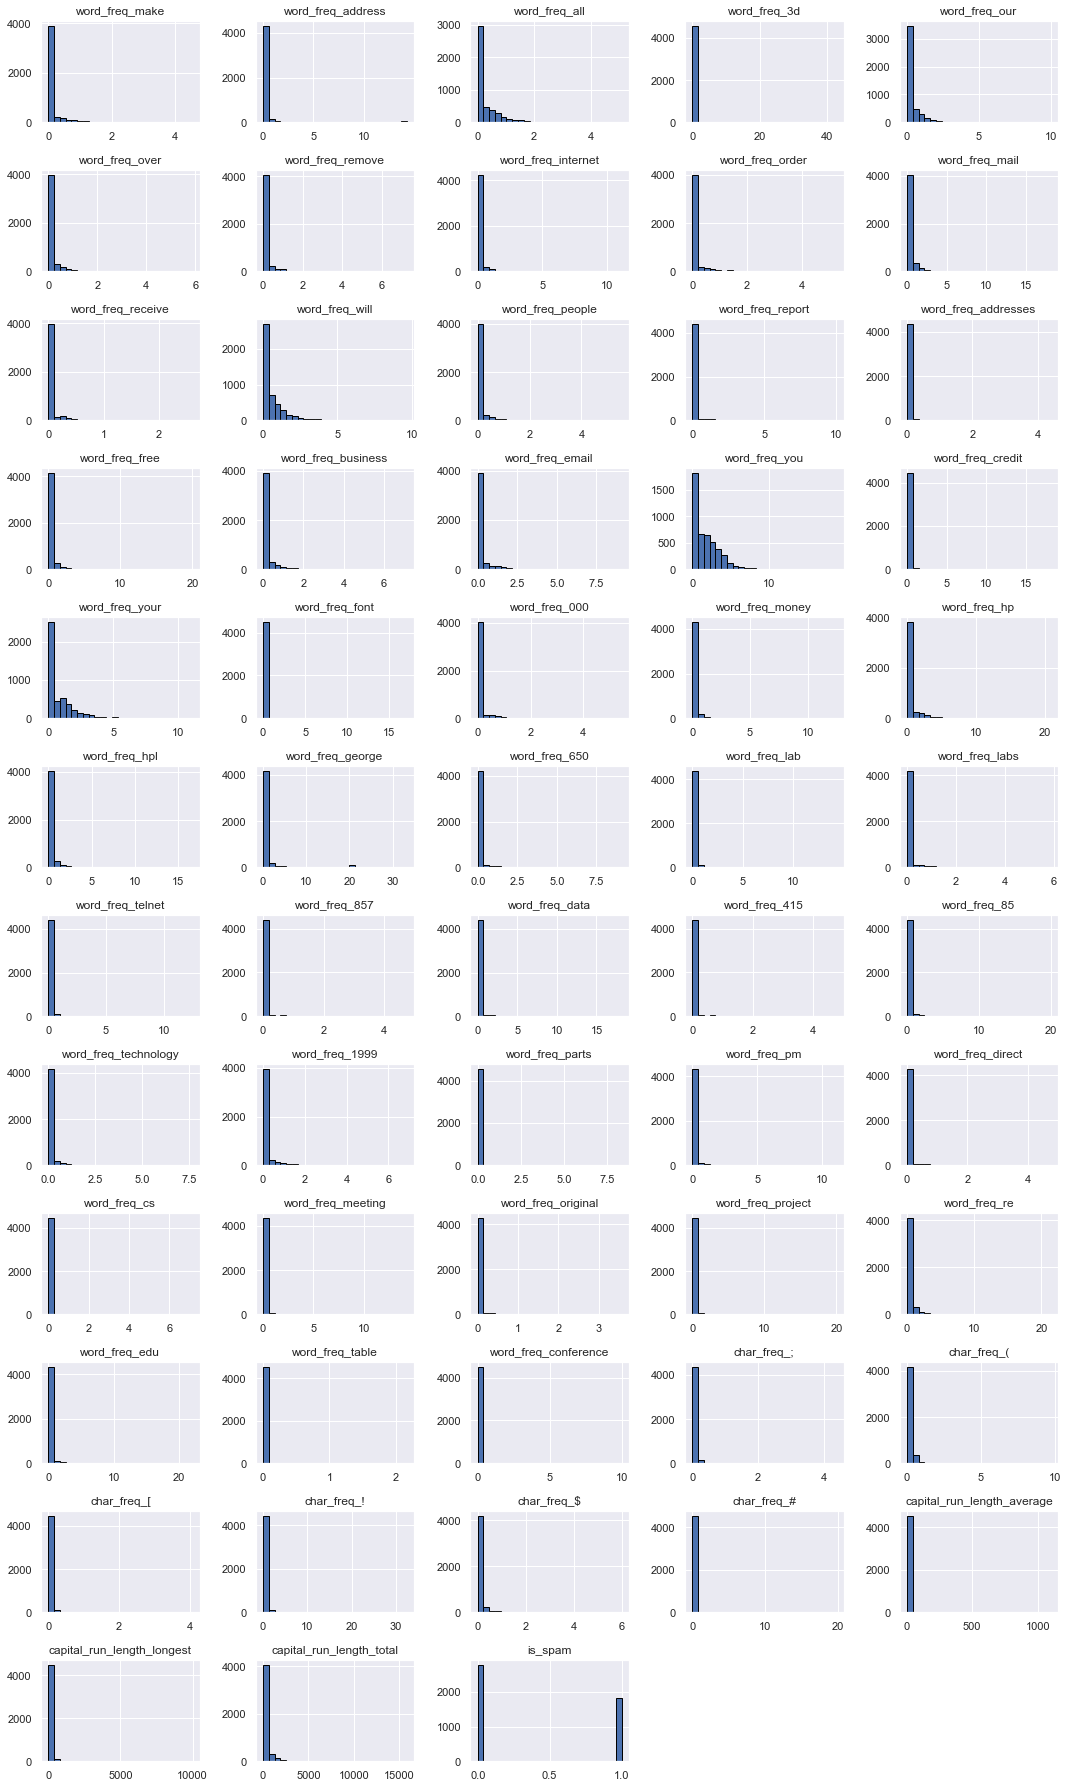

In [36]:
# Features distribuition 

numeric_df = df.select_dtypes(include=[np.number])
numeric_df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout()
plt.show()

The bar plots above reveal that most individual words have low frequencies, with many columns showing a large number of zeros. This implies that certain words or character patterns does not appear very frequently in the dataset, reflecting their rare usage in emails. In many word frequency columns, both the mean and median values are near zero, with only a few instances showing higher frequencies. Meanwhile, columns for character frequencies and capital letter metrics display a broader range, suggesting more variation in their presence across emails.

In [37]:
# Class attribute of type spam
 
plt.style.use('ggplot')
spam_counts = df['is_spam'].value_counts()
spam_labels = ['Not Spam', 'Spam']


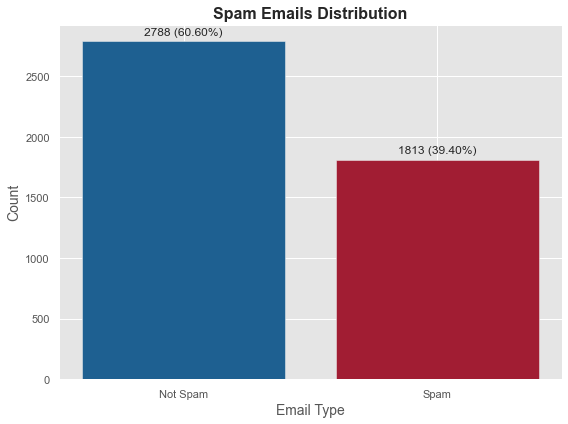

In [38]:
plt.figure(figsize=(8, 6))
plt.bar(spam_labels, spam_counts, color=["#1E6091", "#A11D33"])
plt.title('Spam Emails Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Email Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

for i, count in enumerate(spam_counts):
    plt.text(i, count + 50, f"{count} ({count / spam_counts.sum() * 100:.2f}%)", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

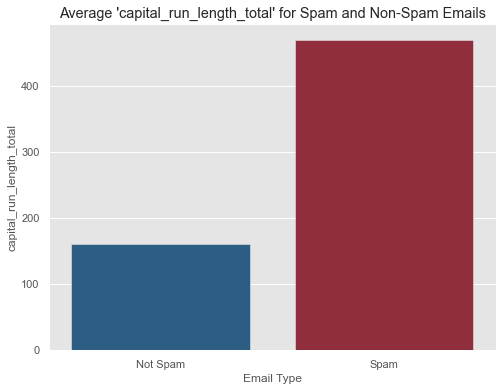

In [39]:
#Comparing the average capital_run_length_total for spam and non-spam emails. 


avg_capital_run_length_total = df.groupby("is_spam")["capital_run_length_total"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_capital_run_length_total, x="is_spam", y="capital_run_length_total", palette=["#1E6091", "#A11D33"])
plt.title("Average 'capital_run_length_total' for Spam and Non-Spam Emails")
plt.xlabel("Email Type")
plt.ylabel("capital_run_length_total")
plt.xticks([0, 1], ["Not Spam", "Spam"])
plt.show()

The variable capital_run_length_total represents the total number of consecutive capital letters in each email. By grouping and calculating the average of this feature by is_spam, it is possible to see if there is a notable difference in capital letter usage between the two types.
As the capital_run_length_total is higher in spam emails, it could serve as a useful indicator for identifying spam, helping to distinguish spam from non-spam in the dataset. Spam emails frequently use sequences of capital letters to emphasize their content, which can draw attention or suggest urgency. 

In [40]:
# Dataset correlation matrix 

corr_matrix = df.corr()
corr_matrix

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059570,0.007669,-0.003959,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.011579,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000865,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024885,0.003918,-0.016281,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.016254,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009777,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087395,0.036677,0.011994,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030285,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029297,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010027,0.019784,0.010267,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005901,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003336,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.053914,0.147336,0.029614,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.048746,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026891,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059570,-0.024885,0.087395,-0.010027,0.053914,1.000000,0.061073,0.079477,0.117333,0.013788,0.053809,0.009081,0.077533,0.009621,0.172995,0.020155,0.064038,0.078242,0.095401,0.058925,0.107152,0.007921,0.211351,0

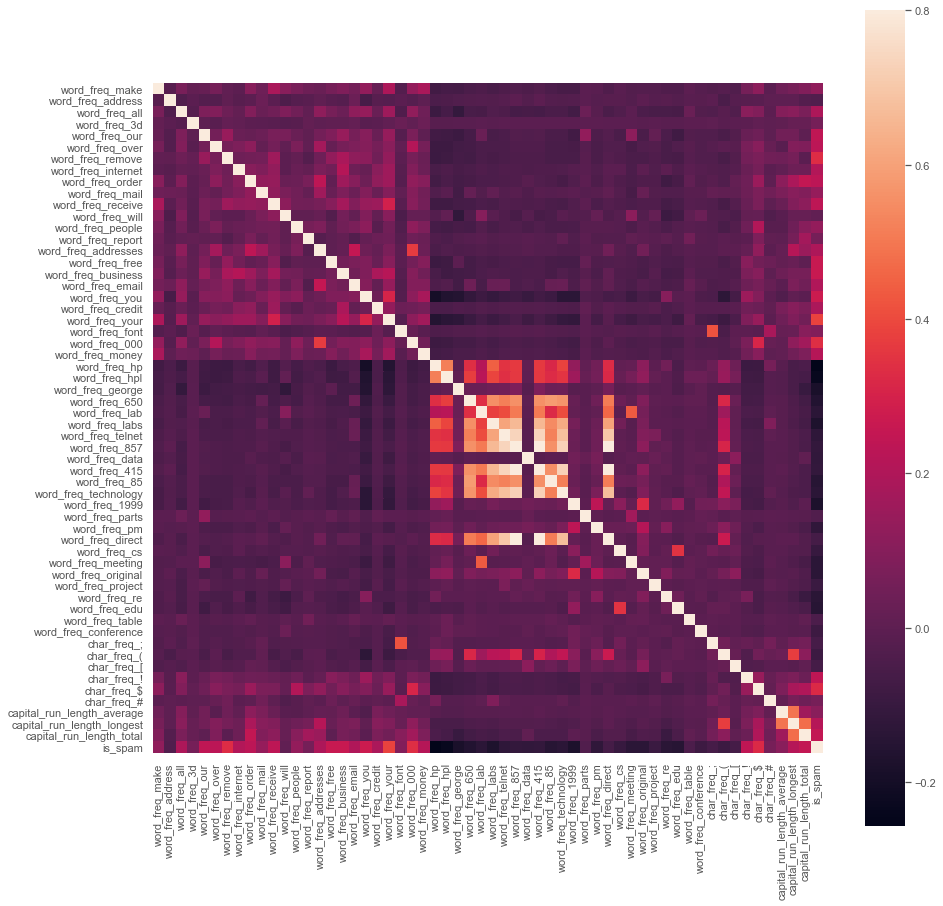

In [41]:
# heatmap to visualize the correlation matrix 

fig = plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, vmax = .8, square = True)
plt.show()

Since the dataset has 57 features, it can be difficult to clearly see the correlations among them. However, it still possible to identify a few features that show strong correlations. Next step will examine these highly correlated features in more detail.

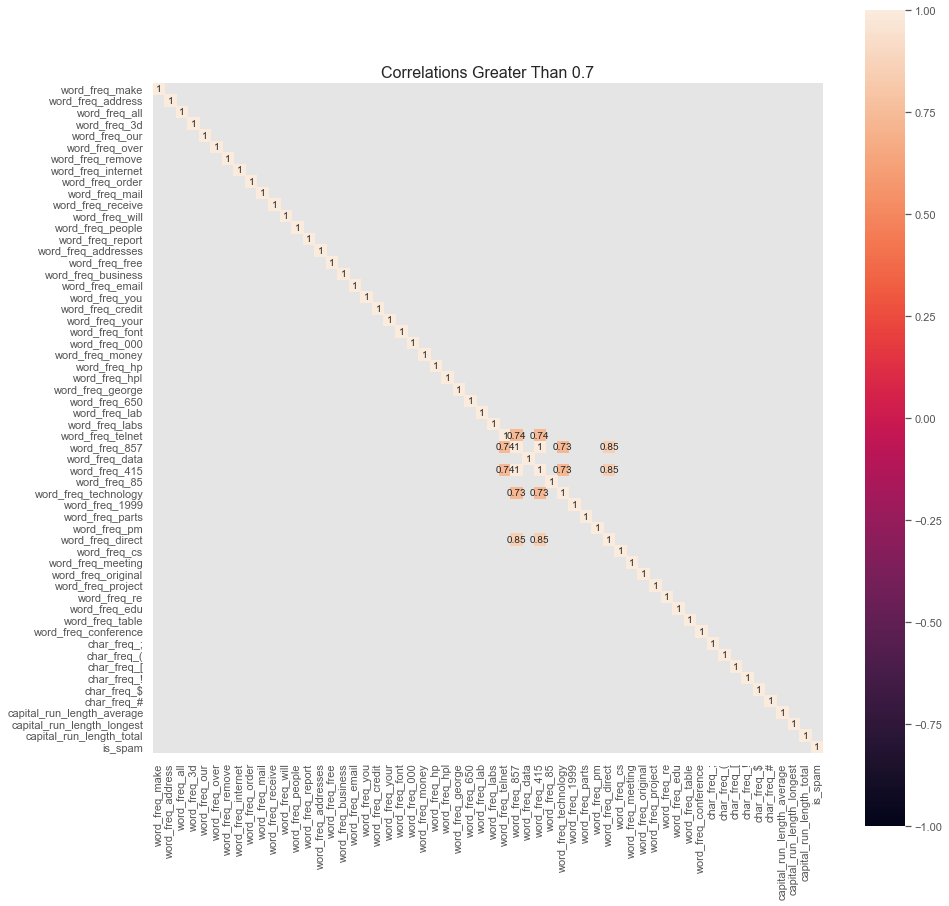

In [42]:
#strong correlations— values greater than 0.7

higher_corr_matrix = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]

plt.figure(figsize=(15, 15))
sns.heatmap(higher_corr_matrix, annot=True, vmax=1, vmin=-1, square=True, cmap='rocket', mask=higher_corr_matrix.isnull())
plt.title('Correlations Greater Than 0.7', fontsize=16)
plt.show()

After filtering the features with higher correlation in the SpamBase dataset, as seen above, it was found high correlations between the frequencies of certain words, which can reveal common themes and strategies used by spammers. For instance, the words "telnet" and "857" might be linked because "telnet" refers to a remote access protocol, while "857" likely denotes a specific product or area code. This could indicate that spam emails frequently promote services or products related to remote access or hacking tools. The pairs "857" and "technology" as well as "857" and "direct" also illustrate this correlation. 

                  TAKING A CLOSER LOOK IN THE FEATURES WITH HIGHER CORRELATION

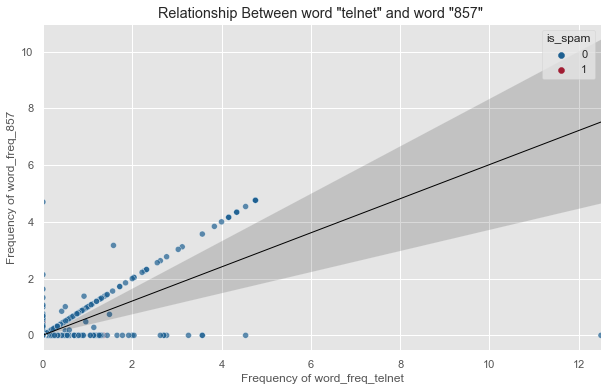

In [43]:
# Relationship Between word_freq_telnet and word_freq_857

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='word_freq_telnet', y='word_freq_857', hue='is_spam', palette=["#1E6091", "#A11D33"], alpha=0.7)
sns.regplot(data=df, x='word_freq_telnet', y='word_freq_857', scatter=False, color='black', line_kws={"linewidth": 1})
plt.title('Relationship Between word "telnet" and word "857" ')
plt.xlabel('Frequency of word_freq_telnet')
plt.ylabel('Frequency of word_freq_857')
plt.show()  

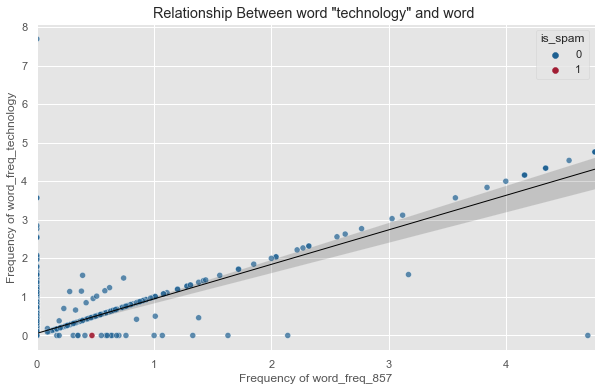

In [44]:
# 3. Relationship Between word_freq_technology and word_freq_857 

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='word_freq_857', y='word_freq_technology', hue='is_spam', palette=["#1E6091", "#A11D33"], alpha=0.7)
sns.regplot(data=df, x='word_freq_857', y='word_freq_technology', scatter=False, color='black', line_kws={"linewidth": 1})
plt.title('Relationship Between word "technology" and word ')
plt.xlabel('Frequency of word_freq_857')
plt.ylabel('Frequency of word_freq_technology')
plt.show() 

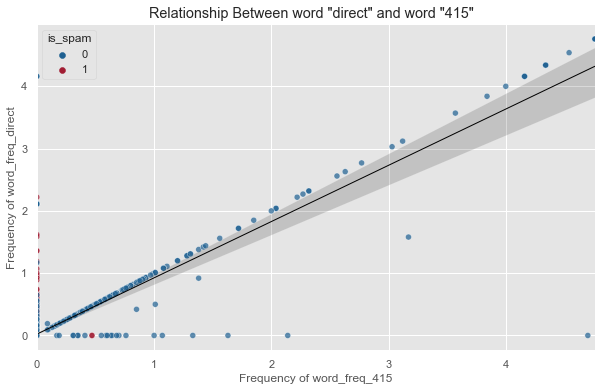

In [45]:
#Relationship Between word_freq_direct and word_freq_415


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='word_freq_857', y='word_freq_direct', hue='is_spam',palette=["#1E6091", "#A11D33"], alpha=0.7)
sns.regplot(data=df, x='word_freq_857', y='word_freq_direct', scatter=False, color='black', line_kws={"linewidth": 1})
plt.title('Relationship Between word "direct" and word "415"  ')
plt.xlabel('Frequency of word_freq_415')
plt.ylabel('Frequency of word_freq_direct')
plt.show()

When looking at the four scatterplots, which show the relationship between features and whether an email is spam or not, it’s clear that certain word combinations are mostly found in non-spam emails. This could be because these words are linked to genuine products, services, or discussions that are more typical in legitimate emails. Additionally, there might be more non-spam emails in the dataset that use these words compared to spam emails. If these terms are often associated with legitimate services or products, their frequent occurrence in non-spam emails can explain the pattern we see. Furthermore, if there’s a strong connection between these words in non-spam emails, the scatter plots may show groups of data points that represent non-spam emails.
- Futher investiation will be made to see the quantity of each word present in Spam and not spam emails.

In [46]:
# Grouping by is_spam and the word frequencies

word_count = df.groupby('is_spam')[['word_freq_telnet', 'word_freq_857','word_freq_415',
                                     'word_freq_direct', 'word_freq_technology']].sum().reset_index()


word_count['is_spam'] = word_count['is_spam'].map({0: 'Not Spam', 1: 'Spam'})
word_count

,is_spam,word_freq_telnet,word_freq_857,word_freq_415,word_freq_direct,word_freq_technology
0,Not Spam,295.62,215.53,216.87,231.73,394.98
1,Spam,2.31,0.94,3.22,66.57,53.51


In [47]:
# Melt the data for better plotting


word_count_melted = word_count.melt(id_vars='is_spam', 
                                       value_vars=['word_freq_telnet', 'word_freq_857', 
                                                   'word_freq_direct', 'word_freq_technology'],
                                       var_name='Word', value_name='Count')



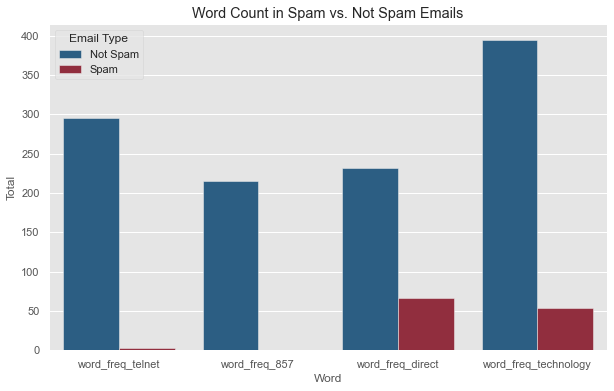

In [48]:
# Plotting 


plt.figure(figsize=(10, 6))
sns.barplot(data=word_count_melted, x='Word', y='Count', hue='is_spam', palette=["#1E6091", "#A11D33"])
plt.title('Word Count in Spam vs. Not Spam Emails')
plt.ylabel('Total')
plt.xlabel('Word')
plt.legend(title='Email Type')
plt.show()

As expected, the words related to word_freq_telnet, word_freq_857, word_freq_415 and word_freq_technology are mostly found in non-spam emails. Their low occurrence in spam emails suggests that spammers tend to avoid the use of these terms, likely because they sound more technical or legitimate. The frequent use of these words in non-spam messages may indicate that they are rare in spam, which can be helpful when creating a spam detection model.

In [49]:
# run it into six different models

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [50]:
df.shape

(4601, 58)

In [51]:
X = df.iloc[:, 0:57] 
y = df.iloc[:, 57]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [52]:
# Split the data into training and validation sets

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [53]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [54]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.925272 (0.013816)
LDA: 0.882880 (0.014143)
KNN: 0.795924 (0.017671)
CART: 0.908696 (0.012285)
NB: 0.825272 (0.017904)
SVM: 0.825815 (0.023136)


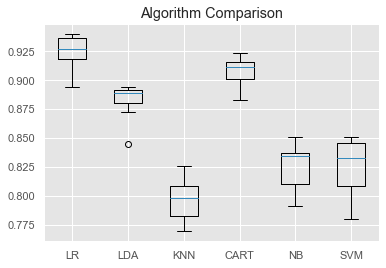

In [55]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [56]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

NameError: name 'predictions' is not defined

- Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it in the context of this data.

In [ ]:
pca_df = df

In [ ]:
# Separating features and target variable

X = pca_df.drop(columns=['is_spam'])
y = df['is_spam']

In [ ]:
# Standardizing the data


scaler = StandardScaler()
X_pca = scaler.fit_transform(X)

In [ ]:
# Fit PCA


pca = PCA()
pca.fit(X_pca)

In [ ]:
# Calculate the explained variance ratio

explained_variance = pca.explained_variance_ratio_

In [ ]:
# Cumulative variance

cumulative_variance = explained_variance.cumsum()

In [ ]:
# Plotting the cumulative variance to visualize how many components are needed

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.995, color='r', linestyle='--')  # Line for 99.5% variance
plt.grid()
plt.show()


In [ ]:
# Determine the number of components for 99.5% variance

n_components = (cumulative_variance >= 0.995).argmax() + 1
n_components

In [ ]:
# Reduce the data to the selected number of components

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_pca)

In [ ]:
# Create a new DataFrame with the reduced data

pca_data = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_data['is_spam'] = y.reset_index(drop=True)

In [ ]:
pca_data

In [ ]:
# run it in six models

df_array = pca_data.values

In [ ]:
X = df_array[:,0:55]
y = df_array[:,55]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
# Split the data into training and validation sets

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [ ]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))